In [8]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd
import matplotlib.pyplot as plt

from utils.analysys_utils import list_experiments_in_dir


sns.set(font="Times New Roman")
font_size = '13'

In [2]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_train_size_exps", "sidarthe_extended", "Italy")
figs_path = os.path.join(experiments_path, "figs") 
if not os.path.exists(figs_path):
    os.makedirs(figs_path)
experiments = list_experiments_in_dir(experiments_path)


In [3]:
data = []
indexes = []


for exp in experiments:
    try: # avoid NaNs
        val_loss = exp['final']['best_epoch']['val_loss']
    except:
        val_loss = np.nan
        #print(f"{exp['uuid']}")
    momentum = exp['settings']['momentum']
    train_size = exp['settings']['train_size']
    
    if(momentum):
        m = exp['settings']['m']
    else:
        m = 'none'

    indexes.append((m,train_size))

    data.append({
        'val_loss': val_loss,
        "momentum": momentum,
        "train_size": train_size,
        "m": m
    })


index = pd.MultiIndex.from_tuples(indexes, names=['m','train_size'])
df = pd.DataFrame(data, index=index)
df

val_loss  momentum  train_size     m
m                   train_size                                          
0.4                 40          1.340632e+07      True          40   0.4
0.2                 60          5.787418e+04      True          60   0.2
                    60          2.822183e+04      True          60   0.2
none                80          1.413210e+07     False          80  none
0.30000000000000004 120         3.102981e+03      True         120   0.3
...                                      ...       ...         ...   ...
none                100         6.632680e+04     False         100  none
0.2                 120         9.062458e+03      True         120   0.2
none                60          7.278451e+04     False          60  none
0.1                 120         1.087138e+04      True         120   0.1
0.0                 80          1.316054e+07      True          80     0

[700 rows x 4 columns]

In [4]:
df_mT = df.query("momentum")
df_mF = df.query("not momentum").reset_index(drop=True)

In [5]:
m_index = df_mT.index.unique('m').sort_values()
t_index = df_mT.index.unique('train_size').sort_values()

In [6]:
df_mF

,val_loss,momentum,train_size,m
0,1.413210e+07,False,80,none
1,3.534177e+06,False,80,none
2,2.061824e+07,False,120,none
3,4.987886e+06,False,120,none
4,9.047927e+06,False,60,none
...,...,...,...,...
95,1.562488e+06,False,40,none
96,3.754735e+05,False,40,none
97,3.274195e+06,False,40,none
98,6.632680e+04,False,100,none


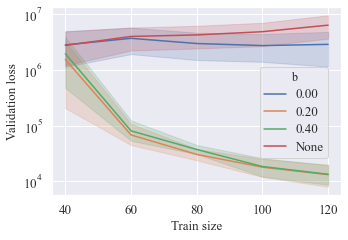

In [20]:
# plot by fixing m

pl, ax = plt.subplots()
ax.set_yscale('log')

for m in m_index[::2]:
    df_m = df_mT.loc[m]
    sns.lineplot(data=df_m, x='train_size', y='val_loss', ax=ax, legend="brief", label=f"{m:.2f}")

plot = sns.lineplot(data=df_mF, x='train_size', y='val_loss', ax=ax, label='None', legend='brief')

plot.set_xlabel("Train size", fontsize=font_size)
plot.set_ylabel("Validation loss", fontsize=font_size)
plot.get_legend().set_title("b")
plot.tick_params(labelsize=font_size)
texts = plot.get_legend().get_texts() 
plt.setp(texts, fontsize=font_size)

figure = plot.get_figure()
figure.set_size_inches((5,3.5))
figure.set_tight_layout(True)

plot.get_legend().set_bbox_to_anchor((0.70,0.44))
#print(dir(plot.get_legend()))
figure.savefig(os.path.join(figs_path, "varying_tsize.pdf"))
